In [5]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# seed параметр генератора случайных чисел
from numpy.random import seed 
from numpy.random import randn

# Критерием Манна-Уитни
from scipy.stats import mannwhitneyu 

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

Для независимых выборок проведем тест Уилкоксона (U-критерий Манна-Уитни)

**Тестируемое изменение** - эффект от препарата

**Цель** - оценить различия в эффекте у пациентов

**Гипотизы:**

    Н:0 Различия в эффекте не наблюдается (его либо нет либо оно одинаковое)    
    Н:1 У пациентов имются различия от приема препарата

In [7]:
# Генерирумм две независимых выборки

np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

# Сравнение групп

stat, p = mannwhitneyu(A, B)
print('Statistics = %.1f, p = %.3f' % (stat, p))
print('------')
alpha = 0.02

if p > alpha:
    print('Различия в эффекте не наблюдается')
else:
    print('У пациентов имются различия от приема препарата')

Statistics = 4343.0, p = 0.054
------
Различия в эффекте не наблюдается


#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

Для связных выборок проведем тест "W-критерий Вилкоксона" 

**Гипотизы:**

    Н:0 Различия в эффекте не наблюдается (его либо нет либо оно одинаковое)    
    Н:1 У пациентов имются различия от приема препарата

In [8]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

from scipy.stats import wilcoxon
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
print('------')
alpha = 0.02

if p > alpha:
    print('Различия в эффекте не наблюдается')
else:
    print('У пациентов имются различия от приема препарата')

Statistics=1930.000, p=0.041
------
Различия в эффекте не наблюдается


#### 3. Дачный эксперимент. 
Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 

In [9]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [10]:
from scipy.stats import f_oneway
f_oneway(water, nutri, mineral)

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

In [11]:
# water and nutri
stats.ttest_ind(water, nutri)

Ttest_indResult(statistic=-4.132232441883167, pvalue=0.0001840453200503376)

In [12]:
# water and mineral
stats.ttest_ind(water, mineral)

Ttest_indResult(statistic=0.10129659201078253, pvalue=0.9198340218471441)

In [13]:
# nutri and mineral
stats.ttest_ind(nutri, mineral)

Ttest_indResult(statistic=4.257784009579262, pvalue=0.00012136733401245426)

После попарного сравнения выборок делаем вывод
1. Есть различия в эффекте nutri от mineral и water
2. Различий между water and mineral не наблюдаются, но не можем это утверждать.

#### 4. Cookie cats

In [15]:
data = pd.read_csv('cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Переменные:
    
userid - уникальный номер, идентифицирующий каждого игрока.

version - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

In [18]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').userid.count().reset_index()

,version,userid
0,gate_30,44700
1,gate_40,45489


У нас сформировались примерно две одинаковые выборки

<AxesSubplot:>

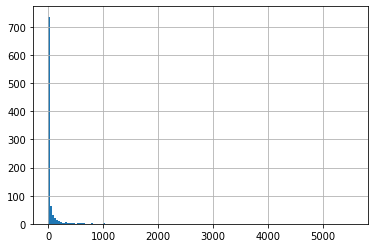

In [40]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()

plot_df.hist(bins=150)

Наибольшее количество игроков сыграли небольшое количество раундов.

Text(0.5, 0, '# Game rounds')

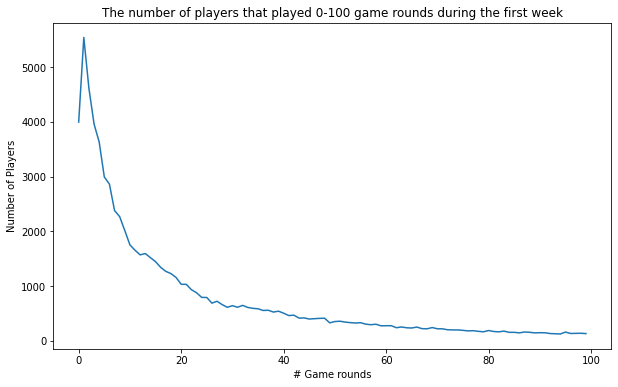

In [41]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

Также видим, что наибольшее количество игроков сыграли несколько раз в первую неделю.

<AxesSubplot:ylabel='Density'>

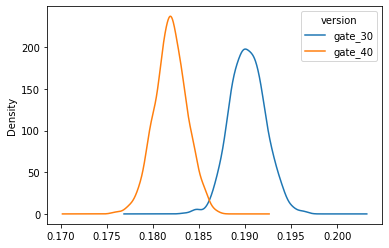

In [68]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Игроки которые вернулись и играли через 7 дней были установлены ворота показанные на графике.

Если интерппретировать 0 - грок не вернулся, а 1 - игрок вернулся к игре, то распределение показывает,
что игроки помещеные в контрольную группу gate_30 в среднем возвращались к игре чаще, чем тестовая группа gate_40 

#### Проверим наличие эффекта из-за сдвига ворот с помощью статистической гипотезы.

In [100]:
gate_40 = data.loc[data.version.isin(['gate_40'])].retention_7

gate_30 = data.loc[data.version.isin(['gate_30'])].retention_7

stat, p = f_oneway(gate_30, gate_40)

print('Statistics = %.2f, p = %.4f' % (stat, p))
print('-')

alpha = 0.05 
print(f'Уровень значимость {alpha}')
print('-')

if p > alpha:
    
    print('Различия в эффекте не наблюдается')
else:
    print('Наблюдается различия в эффекте из-за сдвига ворот')

Statistics = 10.01, p = 0.0016
-
Уровень значимость 0.05
-
Наблюдается различия в эффекте из-за сдвига ворот


Игроки с воротам на 30 уровне возвращались к игре чаще, чем игроки с воротами на 40 уровнеь